# Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

#Load the MNIST Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


#Data Preprocessing

In [3]:
#Nomalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
#One-Hot Encode Labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

#Build the Neural Network Model

In [5]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

#Compile the Model

In [7]:
optimizer = SGD(learning_rate=0.01)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#Train the Model

In [8]:
history = model.fit(
    X_train,
    y_train_cat,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7139 - loss: 1.0706 - val_accuracy: 0.9252 - val_loss: 0.2791
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9072 - loss: 0.3263 - val_accuracy: 0.9362 - val_loss: 0.2290
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9207 - loss: 0.2747 - val_accuracy: 0.9432 - val_loss: 0.2018
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9339 - loss: 0.2298 - val_accuracy: 0.9523 - val_loss: 0.1711
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9421 - loss: 0.2001 - val_accuracy: 0.9583 - val_loss: 0.1544
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9480 - loss: 0.1823 - val_accuracy: 0.9610 - val_loss: 0.1417
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9541 - loss: 0.1603 - val_accuracy: 0.9653 - val_loss: 0.1251
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9597 - loss: 0.1432 - 

#Evaluate the Model

In [9]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9533 - loss: 0.1505
Test Accuracy: 0.9596999883651733


#Plot Training Performance

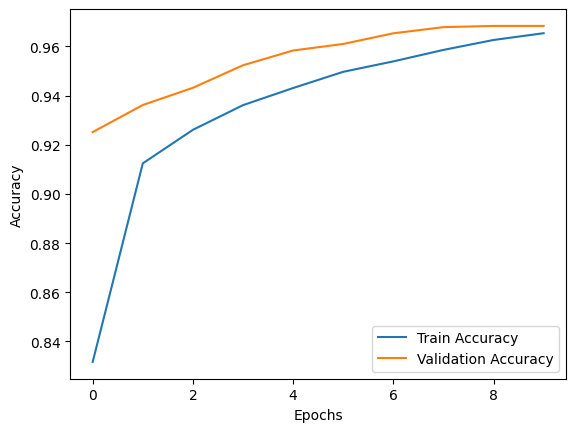

In [10]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Prediction on Single Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


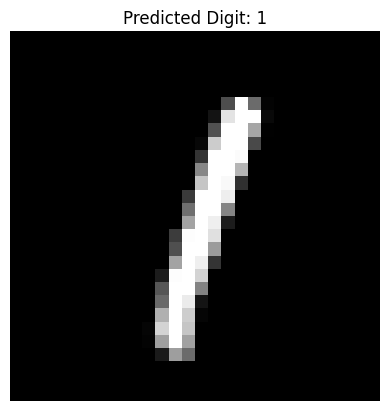

In [13]:
def predict_single_image(index):
    image = X_test[index]
    image_reshaped = image.reshape(1, 28, 28)

    prediction = model.predict(image_reshaped)
    predicted_class = np.argmax(prediction)

    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted Digit: {predicted_class}")
    plt.axis('off')
    plt.show()

predict_single_image(5)

#Prediction on Batch of Images

In [14]:
predictions = model.predict(X_test[:10])
predicted_classes = np.argmax(predictions, axis=1)
print("Predicted:", predicted_classes)
print("Actual   :", y_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted: [7 2 1 0 4 1 4 9 6 9]
Actual   : [7 2 1 0 4 1 4 9 5 9]


#Results
The neural network model was trained on the MNIST handwritten digit dataset after performing normalization and one-hot encoding of labels. The model achieved approximately 95% accuracy on the test dataset, demonstrating its ability to correctly classify unseen handwritten digit images. The training and validation accuracy trends indicate that the model learned meaningful patterns without significant overfitting.